In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [2]:
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10
sb.set_style("whitegrid")

In [3]:
iris = datasets.load_iris()
#scale the data
data = scale(iris.data)
target = pd.DataFrame(iris.target)
variable_names = iris.feature_names
data[0:10]

array([[-0.9007,  1.019 , -1.3402, -1.3154],
       [-1.143 , -0.132 , -1.3402, -1.3154],
       [-1.3854,  0.3284, -1.3971, -1.3154],
       [-1.5065,  0.0982, -1.2834, -1.3154],
       [-1.0218,  1.2492, -1.3402, -1.3154],
       [-0.5372,  1.9398, -1.1697, -1.0522],
       [-1.5065,  0.7888, -1.3402, -1.1838],
       [-1.0218,  0.7888, -1.2834, -1.3154],
       [-1.7489, -0.3622, -1.3402, -1.3154],
       [-1.143 ,  0.0982, -1.2834, -1.4471]])

In [4]:
z = linkage(data,"ward")

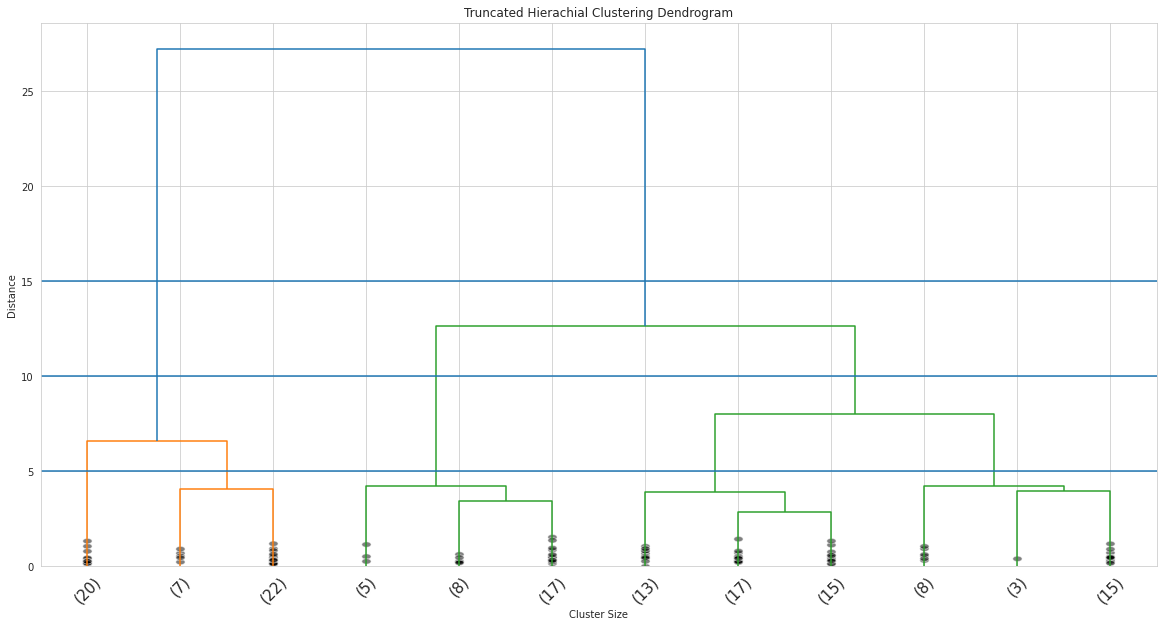

In [5]:
#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [6]:
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(data)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.013333333333333334